# Data Exploration and Preprocessing

This notebook is dedicated to the initial exploration and preprocessing of the dataset. We aim to understand the data's structure, content, and any inherent patterns or anomalies that may exist.


##### Read the uploaded TSV file to understand its structure and contents

In [8]:
import pandas as pd

In [9]:
# Load the TSV file into a DataFrame
file_path = '../data/raw/filtered.tsv'
data = pd.read_csv(file_path, sep='\t')

data.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


##### Data Exploration

In [10]:
# Descriptive statistics for numeric features
data_description = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

# Distribution of Toxicity Levels
toxicity_distribution_ref = data['ref_tox'].describe()
toxicity_distribution_trn = data['trn_tox'].describe()

# Prepare data for histogram plots of toxicity levels
toxicity_levels_ref = data['ref_tox']
toxicity_levels_trn = data['trn_tox']

In [11]:
data_description

,Unnamed: 0,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000,577777.000000
mean,288888.000000,0.758469,0.157652,0.541372,0.434490
std,166789.997578,0.092695,0.108057,0.457571,0.458904
min,0.000000,0.600001,0.000000,0.000033,0.000033
25%,144444.000000,0.681105,0.066667,0.012171,0.000707
50%,288888.000000,0.754439,0.141791,0.806795,0.085133
75%,433332.000000,0.831244,0.238095,0.990469,0.973739
max,577776.000000,0.950000,0.400000,0.999724,0.999730


In [12]:
missing_values

Unnamed: 0     0
reference      0
translation    0
similarity     0
lenght_diff    0
ref_tox        0
trn_tox        0
dtype: int64

In [13]:
toxicity_distribution_ref

count    577777.000000
mean          0.541372
std           0.457571
min           0.000033
25%           0.012171
50%           0.806795
75%           0.990469
max           0.999724
Name: ref_tox, dtype: float64

In [14]:
toxicity_distribution_trn

count    577777.000000
mean          0.434490
std           0.458904
min           0.000033
25%           0.000707
50%           0.085133
75%           0.973739
max           0.999730
Name: trn_tox, dtype: float64

In [15]:
toxicity_levels_ref

0         0.014195
1         0.065473
2         0.213313
3         0.053362
4         0.009402
            ...   
577772    0.000121
577773    0.996124
577774    0.984538
577775    0.991945
577776    0.009480
Name: ref_tox, Length: 577777, dtype: float64

In [16]:
toxicity_levels_trn

0         0.981983
1         0.999039
2         0.985068
3         0.994215
4         0.999348
            ...   
577772    0.949143
577773    0.215794
577774    0.000049
577775    0.000124
577776    0.994174
Name: trn_tox, Length: 577777, dtype: float64

In [17]:
import matplotlib.pyplot as plt

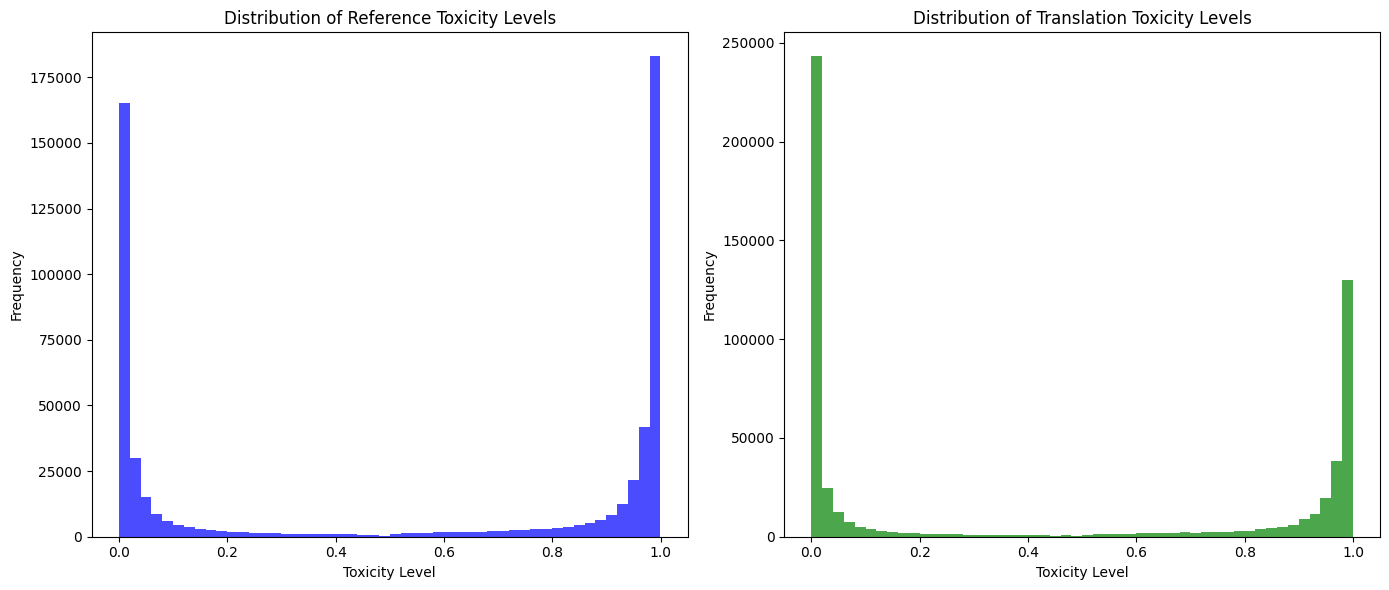

In [18]:
# Plotting histograms for toxicity distribution
plt.figure(figsize=(14, 6))

# Histogram for reference toxicity levels
plt.subplot(1, 2, 1)
plt.hist(toxicity_levels_ref, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Reference Toxicity Levels')
plt.xlabel('Toxicity Level')
plt.ylabel('Frequency')

# Histogram for translation toxicity levels
plt.subplot(1, 2, 2)
plt.hist(toxicity_levels_trn, bins=50, color='green', alpha=0.7)
plt.title('Distribution of Translation Toxicity Levels')
plt.xlabel('Toxicity Level')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

The histograms show the distribution of toxicity levels for both reference and translation sentences:

- The blue histogram represents the toxicity levels of the reference sentences. It shows a bimodal distribution with peaks at the lower and higher ends of the toxicity scale, indicating that the dataset contains a mix of sentences with low and high levels of toxicity.
- The green histogram represents the toxicity levels of the translation sentences. This distribution is more skewed towards lower toxicity levels, which is expected since these sentences are the detoxified versions of their reference counterparts.